#6IA - Modelos de Machine Learning

##Aula 3

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
# Carregado dataset

columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()
diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=columns)

y = diabetes.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

print(X_train.shape, y_train.shape)

(353, 10) (353,)


In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[:5]

array([ 76.39808153, 126.87517037, 242.09734443, 101.59238931,
       118.60697331])

Text(0, 0.5, 'Predicoes')

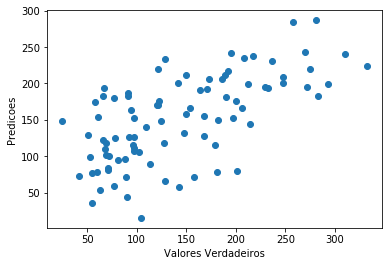

In [10]:
plt.scatter(y_test, predictions)
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Predicoes')

In [11]:
print('Score: {0}'.format(model.score(X_test, y_test)))

Score: 0.3737937911737951


### Validações

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [13]:
scores = cross_val_score(model, df, y, cv=8)
print('Score de validação cruzada: {0}'.format(scores))

Score de validação cruzada: [0.50283713 0.18991026 0.56539865 0.36996563 0.60047052 0.33262653
 0.41404403 0.68712879]


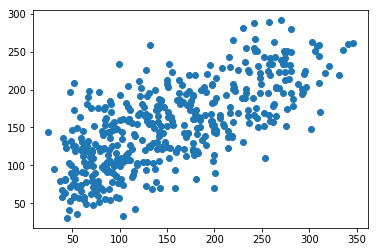

In [14]:
predictions = cross_val_predict(model, df, y, cv=8)
plt.scatter(y, predictions)

In [19]:
accuracy = metrics.r2_score(y, predictions)
print('Acuracia via Predicao Cruzada: {0}'.format(accuracy))

Acuracia via Predicao Cruzada: 0.4921056046382971


# Exemplo: KNN

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [22]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving DadosKNN.csv to DadosKNN.csv
Arquivo "DadosKNN.csv" importado pelo usuário com tamanho de 195324 bytes


In [28]:
df = pd.read_csv("DadosKNN.csv", sep=',', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [31]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [0]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[135  14]
 [  9 142]]


In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       149
           1       0.91      0.94      0.93       151

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [0]:
error_rate=[]

for i in range(1, 25):
  knn=KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Taxa de Erro')

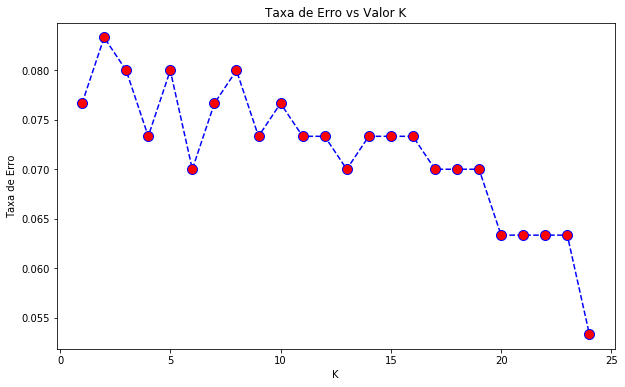

In [52]:
plt.figure(figsize=(10,6))

plt.plot(range(1, 25), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Taxa de Erro vs Valor K')

plt.xlabel('K')
plt.ylabel('Taxa de Erro')